# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Anindha Arsya Dhaniswara]
- **Email:** [anindhaarsya109@gmail.com]
- **ID Dicoding:** [anindha_arsya_7wFE]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana trend penyewaan sepeda sepanjang tahun?
- Bagaimana hari dalam minggu memengaruhi jumlah penyewaan?
- Bagaimana pengaruh kategori suhu terhadap jumlah penyewaan?
- Berapa banyak penyewaan yang dilakukan oleh pelanggan terdaftar dibandingkan dengan pelanggan kasual?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/anindhaarsya/BikeShareDicoding/refs/heads/main/Data/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/anindhaarsya/BikeShareDicoding/refs/heads/main/Data/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**

Terdapat informasi terkait detail setiap kolom yaitu:
- instant: Nomor urut dari setiap entri data.
- dteday: Tanggal dalam format objek, menunjukkan kapan data tersebut direkam.
- season: Musim dalam bentuk numerik (1: Winter, 2: Spring, 3: Summer, 4: Fall).
- yr: Tahun dalam bentuk numerik (0: 2011, 1: 2012).
- mnth: Bulan dalam bentuk numerik (1 untuk Januari hingga 12 untuk Desember).
- holiday: Indikator apakah hari tersebut adalah hari libur nasional (1: Libur, 0: Bukan Libur).
- weekday: Hari dalam seminggu dalam bentuk numerik (0 untuk Minggu hingga 6 untuk Sabtu).
- workingday: Indikator apakah hari tersebut adalah hari kerja (1: Hari kerja, 0: Bukan hari kerja).
- weathersit: Kondisi cuaca dalam bentuk numerik:
  
  1: Cerah

  2: Mendung

  3: Hujan

- temp: Temperatur normalisasi (0 hingga 1) yang sesuai dengan suhu aktual dalam skala Celsius.
- atemp: Temperatur "feels-like" (perasaan suhu) yang dinormalisasi (0 hingga 1).
- hum: Kelembaban udara yang dinormalisasi (0 hingga 1).
- windspeed: Kecepatan angin yang dinormalisasi (0 hingga 1).
- casual: Jumlah pengguna sepeda yang tidak terdaftar atau bukan anggota.
- registered: Jumlah pengguna sepeda yang terdaftar sebagai anggota.
- cnt: Total jumlah pengguna sepeda (gabungan antara casual dan registered).

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
day_df.duplicated().sum()

0

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
day_df['season'].value_counts()

,count
season,
3,188
2,184
1,181
4,178


In [10]:
hour_df['season'].value_counts()

,count
season,
3,4496
2,4409
1,4242
4,4232


In [11]:
day_df['weathersit'].value_counts()

,count
weathersit,
1,463
2,247
3,21


In [12]:
#Memeriksa Konsistensi Data Cnt pada day_df
assert (day_df['cnt'] == day_df['casual'] + day_df['registered']).all(), "Jumlah cnt tidak konsisten!"

In [13]:
#Memeriksa Memeriksa Normalisasi Data (Untuk Kolom dengan Nilai 0-1) pada day_df
assert (day_df[['temp', 'atemp', 'hum', 'windspeed']].apply(lambda col: col.between(0, 1)).all(axis=None)), "Ada nilai di luar rentang 0-1!"

In [14]:
#Memeriksa Memeriksa Normalisasi Data (Untuk Kolom dengan Nilai 0-1) pada hour_df
assert (hour_df[['temp', 'atemp', 'hum', 'windspeed']].apply(lambda col: col.between(0, 1)).all(axis=None)), "Ada nilai di luar rentang 0-1!"

In [15]:
#Memeriksa Konsistensi Data Cnt pada hour_df
assert (hour_df['cnt'] == hour_df['casual'] + hour_df['registered']).all(), "Jumlah cnt tidak konsisten!"

<Axes: ylabel='temp'>

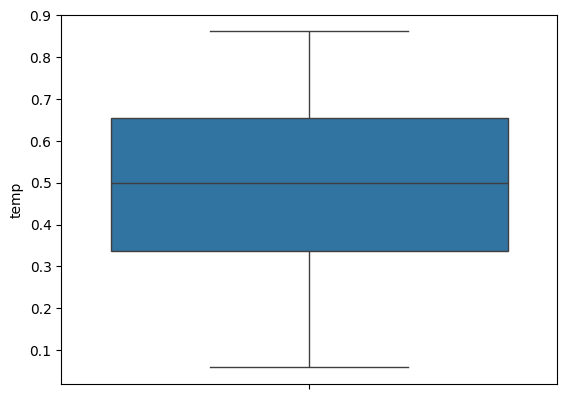

In [16]:
sns.boxplot(day_df['temp'])

<Axes: ylabel='temp'>

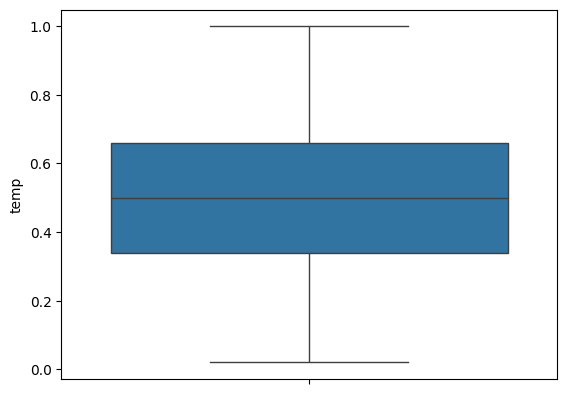

In [17]:
sns.boxplot(hour_df['temp'])

<Axes: ylabel='cnt'>

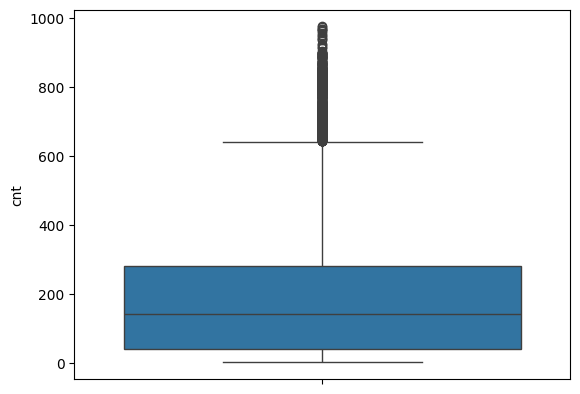

In [18]:
#Cek oulier pada kolom 'cnt'
sns.boxplot(hour_df['cnt'])

<Axes: ylabel='cnt'>

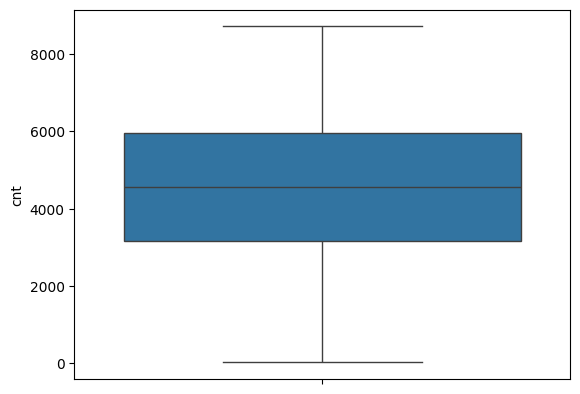

In [19]:
#Cek oulier pada kolom 'cnt'
sns.boxplot(day_df['cnt'])

In [20]:
# Cek jumlah nilai unik pada kolom season, weathersit, dan weekday
day_df[['season', 'weathersit', 'weekday']].nunique()

,0
season,4
weathersit,3
weekday,7


In [21]:
# Cek jumlah nilai unik pada kolom season, weathersit, dan weekday
hour_df[['season', 'weathersit', 'weekday']].nunique()

,0
season,4
weathersit,4
weekday,7


In [22]:
# Cek nilai unik pada kolom season, weathersit, dan weekday
unique_values1 = day_df[['season', 'weathersit', 'weekday']].apply(lambda col: col.unique())
print(unique_values1)

season                 [1, 2, 3, 4]
weathersit                [2, 1, 3]
weekday       [6, 0, 1, 2, 3, 4, 5]
dtype: object


In [23]:
# Cek nilai unik pada kolom season, weathersit, dan weekday
unique_values2 = hour_df[['season', 'weathersit', 'weekday']].apply(lambda col: col.unique())
print(unique_values2)

season                 [1, 2, 3, 4]
weathersit             [1, 2, 3, 4]
weekday       [6, 0, 1, 2, 3, 4, 5]
dtype: object


**Insight:**
- Dataset day_df terdiri 731 baris dan 17 kolom sedangkan hour_df terdiri dari 17.379 baris dan 17 kolom
- Terdiri dari 3 tipe data yaitu datetime (setelah diubah), int, float, dan object
- Tidak ada data duplikat dan data null dari kedua dataframe tersebut
- Terdapat Outlier pada kolom 'cnt' dataframe hour_df

### Cleaning Data

In [24]:
#Mengubah tipe data menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [25]:
#Mengubah tipe data menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [26]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Winsorizing: mengganti outlier
hour_df['cnt_cleaned'] = hour_df['cnt'].clip(lower=lower_bound, upper=upper_bound)

In [27]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_cleaned
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,119.0
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,89.0
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,90.0
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,61.0


<Axes: ylabel='cnt_cleaned'>

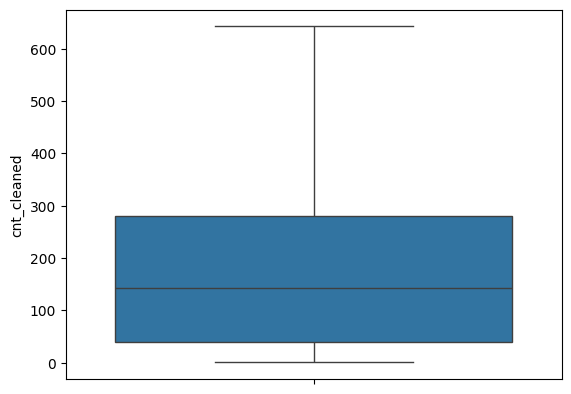

In [28]:
sns.boxplot(hour_df['cnt_cleaned'])

**Insight:**
- Terdapat ketidaksesuaian tipe data pada kolom 'dteday' sehingga perlu diubah menjadi datetime
- Terdapat outlier pada kolom cnt sehingga perlu dibersihkan menggunakan teknik winsorizing

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="instant",
    right_on="instant",
    suffixes=('_hourly', '_daily')
)
all_df

,instant,dteday_hourly,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
day_df_after = day_df.copy()

In [31]:
# Replace values in 'yr' column
day_df_after['yr'] = day_df_after['yr'].replace({0: 2011, 1: 2012})
day_df_after

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [32]:
# Kamus kolom mnth
mnth = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}
day_df_after['mnth'] = day_df_after['mnth'].map(mnth)

# Tampilkan hasil
day_df_after

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,Januari,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,Januari,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,Januari,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,Januari,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,Januari,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,Desember,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,2012,Desember,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,2012,Desember,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,2012,Desember,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [33]:
# Kamus untuk mengubah nilai 0-6 menjadi nama hari
weekday= {
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
}

# Menggunakan map untuk mengganti nilai weekday
day_df_after['weekday'] = day_df_after['weekday'].map(weekday)

# Tampilkan hasil
day_df_after

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,Januari,0,Sabtu,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,Januari,0,Minggu,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,Januari,0,Senin,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,Januari,0,Selasa,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,Januari,0,Rabu,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,Desember,0,Kamis,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,2012,Desember,0,Jumat,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,2012,Desember,0,Sabtu,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,2012,Desember,0,Minggu,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [34]:
weathersit= {
    1: 'Cerah', 2: 'Mendung', 3: 'Hujan'
}

# Menggunakan map untuk mengganti nilai weathersit
day_df_after['weathersit'] = day_df_after['weathersit'].map(weathersit)

# Tampilkan hasil
day_df_after

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,Januari,0,Sabtu,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,Januari,0,Minggu,0,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,Januari,0,Senin,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,Januari,0,Selasa,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,Januari,0,Rabu,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,Desember,0,Kamis,1,Mendung,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,2012,Desember,0,Jumat,1,Mendung,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,2012,Desember,0,Sabtu,0,Mendung,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,2012,Desember,0,Minggu,0,Cerah,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [35]:
day_df_after['holiday'] = day_df_after['holiday'].replace({0: 'bukan libur', 1: 'libur'})
day_df_after

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,Januari,bukan libur,Sabtu,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,Januari,bukan libur,Minggu,0,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,Januari,bukan libur,Senin,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,Januari,bukan libur,Selasa,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,Januari,bukan libur,Rabu,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,Desember,bukan libur,Kamis,1,Mendung,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,2012,Desember,bukan libur,Jumat,1,Mendung,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,2012,Desember,bukan libur,Sabtu,0,Mendung,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,2012,Desember,bukan libur,Minggu,0,Cerah,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [36]:
day_df_after['workingday'] = day_df_after['workingday'].replace({0: 'bukan hari kerja', 1: 'hari kerja'})
day_df_after

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,Januari,bukan libur,Sabtu,bukan hari kerja,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,Januari,bukan libur,Minggu,bukan hari kerja,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,Januari,bukan libur,Senin,hari kerja,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,Januari,bukan libur,Selasa,hari kerja,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,Januari,bukan libur,Rabu,hari kerja,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,Desember,bukan libur,Kamis,hari kerja,Mendung,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,2012,Desember,bukan libur,Jumat,hari kerja,Mendung,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,2012,Desember,bukan libur,Sabtu,bukan hari kerja,Mendung,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,2012,Desember,bukan libur,Minggu,bukan hari kerja,Cerah,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [37]:
season= {
    1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'
}

# Menggunakan map untuk mengganti nilai season
day_df_after['season'] = day_df_after['season'].map(season)

# Tampilkan hasil
day_df_after

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,Januari,bukan libur,Sabtu,bukan hari kerja,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,Januari,bukan libur,Minggu,bukan hari kerja,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,Januari,bukan libur,Senin,hari kerja,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,Januari,bukan libur,Selasa,hari kerja,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,Januari,bukan libur,Rabu,hari kerja,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Winter,2012,Desember,bukan libur,Kamis,hari kerja,Mendung,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Winter,2012,Desember,bukan libur,Jumat,hari kerja,Mendung,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Winter,2012,Desember,bukan libur,Sabtu,bukan hari kerja,Mendung,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Winter,2012,Desember,bukan libur,Minggu,bukan hari kerja,Cerah,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [38]:
day_df_after['atemp_category'] = day_df_after['atemp'].apply(
    lambda x: 'Rendah' if 0.07 <= x <= 0.33 else 'Sedang' if 0.34 <= x <= 0.60 else 'Tinggi'
)
day_df_after

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_category
0,1,2011-01-01,Winter,2011,Januari,bukan libur,Sabtu,bukan hari kerja,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985,Sedang
1,2,2011-01-02,Winter,2011,Januari,bukan libur,Minggu,bukan hari kerja,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801,Sedang
2,3,2011-01-03,Winter,2011,Januari,bukan libur,Senin,hari kerja,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Rendah
3,4,2011-01-04,Winter,2011,Januari,bukan libur,Selasa,hari kerja,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Rendah
4,5,2011-01-05,Winter,2011,Januari,bukan libur,Rabu,hari kerja,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Rendah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Winter,2012,Desember,bukan libur,Kamis,hari kerja,Mendung,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Rendah
727,728,2012-12-28,Winter,2012,Desember,bukan libur,Jumat,hari kerja,Mendung,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Rendah
728,729,2012-12-29,Winter,2012,Desember,bukan libur,Sabtu,bukan hari kerja,Mendung,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Rendah
729,730,2012-12-30,Winter,2012,Desember,bukan libur,Minggu,bukan hari kerja,Cerah,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Rendah


In [39]:
day_df_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   instant         731 non-null    int64         
 1   dteday          731 non-null    datetime64[ns]
 2   season          731 non-null    object        
 3   yr              731 non-null    int64         
 4   mnth            731 non-null    object        
 5   holiday         731 non-null    object        
 6   weekday         731 non-null    object        
 7   workingday      731 non-null    object        
 8   weathersit      731 non-null    object        
 9   temp            731 non-null    float64       
 10  atemp           731 non-null    float64       
 11  hum             731 non-null    float64       
 12  windspeed       731 non-null    float64       
 13  casual          731 non-null    int64         
 14  registered      731 non-null    int64         
 15  cnt   

In [40]:
day_df_after.cnt.max()

8714

In [41]:
day_df_after.cnt.min()

22

In [42]:
day_df_after.groupby(by=["yr","weathersit"]).agg({
    "cnt": "mean",
})

cnt
yr   weathersit             
2011 Cerah       3694.986726
     Hujan       1674.133333
     Mendung     3088.096774
2012 Cerah       6003.734177
     Hujan       2126.166667
     Mendung     4991.333333

In [43]:
#Korelasi Kondisi Cuaca/Lingkungan
relevant_data2 = day_df_after[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

# Menghitung matriks korelasi
correlation_matrix = relevant_data2.corr()
print("Korelasi antar variabel:")
print(correlation_matrix['cnt'])

Korelasi antar variabel:
temp         0.627494
atemp        0.631066
hum         -0.100659
windspeed   -0.234545
cnt          1.000000
Name: cnt, dtype: float64


In [44]:
day_df_after.groupby(by=["yr","mnth"]).agg({
    "cnt": "mean",
})

cnt
yr   mnth                  
2011 Agustus    4409.387097
     April      3162.333333
     Desember   2816.870968
     Februari   1721.964286
     Januari    1231.903226
     Juli       4559.387097
     Juni       4783.733333
     Maret      2065.967742
     Mei        4381.322581
     November   3405.566667
     Oktober    3984.225806
     September  4247.266667
2012 Agustus    6919.451613
     April      5807.466667
     Desember   3990.741935
     Februari   3556.448276
     Januari    3120.774194
     Juli       6567.967742
     Juni       6761.000000
     Maret      5318.548387
     Mei        6318.225806
     November   5088.800000
     Oktober    6414.225806
     September  7285.766667

In [45]:
yearly_avg = day_df_after.groupby('yr').cnt.mean()
yearly_avg

,cnt
yr,
2011,3405.761644
2012,5599.934426


In [46]:
monthly_rentals = day_df_after.groupby(by=["yr","mnth"]).agg({
    "cnt": "sum",
}).sort_values(by=["yr", "cnt"])
monthly_rentals

cnt
yr   mnth             
2011 Januari     38189
     Februari    48215
     Maret       64045
     Desember    87323
     April       94870
     November   102167
     Oktober    123511
     September  127418
     Mei        135821
     Agustus    136691
     Juli       141341
     Juni       143512
2012 Januari     96744
     Februari   103137
     Desember   123713
     November   152664
     Maret      164875
     April      174224
     Mei        195865
     Oktober    198841
     Juni       202830
     Juli       203607
     Agustus    214503
     September  218573

In [47]:
weekly_avg = day_df_after.groupby(by=["yr","weekday"]).agg({
    "cnt": "mean",
})
weekly_avg

cnt
yr   weekday             
2011 Jumat    3500.115385
     Kamis    3356.769231
     Minggu   3405.269231
     Rabu     3253.250000
     Sabtu    3391.377358
     Selasa   3468.038462
     Senin    3465.788462
2012 Jumat    5880.461538
     Kamis    5977.750000
     Minggu   5036.849057
     Rabu     5843.826923
     Sabtu    5732.000000
     Selasa   5553.288462
     Senin    5194.000000

In [48]:
weekday_total=day_df_after.groupby(by=["yr","weekday"]).agg({
    "cnt": "sum",
})
weekday_total

cnt
yr   weekday        
2011 Jumat    182006
     Kamis    174552
     Minggu   177074
     Rabu     169169
     Sabtu    179743
     Selasa   180338
     Senin    180221
2012 Jumat    305784
     Kamis    310843
     Minggu   266953
     Rabu     303879
     Sabtu    298064
     Selasa   288771
     Senin    275282

In [49]:
day_df_after.atemp.max()

0.840896

In [50]:
day_df_after.atemp.min()

0.0790696

In [51]:
day_df_after[['atemp', 'temp']].sort_values(by='atemp', ascending=False)

,atemp,temp
202,0.840896,0.848333
201,0.826371,0.815000
553,0.804913,0.861667
203,0.804287,0.849167
204,0.794829,0.830000
...,...,...
23,0.117930,0.097391
8,0.116175,0.138333
407,0.101658,0.127500
22,0.098839,0.096522


In [52]:
day_df_after['atemp_category'] = day_df_after['atemp'].apply(
    lambda x: 'Rendah' if 0.07 <= x <= 0.33 else 'Sedang' if 0.34 <= x <= 0.60 else 'Tinggi'
)
day_df_after

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_category
0,1,2011-01-01,Winter,2011,Januari,bukan libur,Sabtu,bukan hari kerja,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985,Sedang
1,2,2011-01-02,Winter,2011,Januari,bukan libur,Minggu,bukan hari kerja,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801,Sedang
2,3,2011-01-03,Winter,2011,Januari,bukan libur,Senin,hari kerja,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Rendah
3,4,2011-01-04,Winter,2011,Januari,bukan libur,Selasa,hari kerja,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Rendah
4,5,2011-01-05,Winter,2011,Januari,bukan libur,Rabu,hari kerja,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Rendah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Winter,2012,Desember,bukan libur,Kamis,hari kerja,Mendung,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Rendah
727,728,2012-12-28,Winter,2012,Desember,bukan libur,Jumat,hari kerja,Mendung,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Rendah
728,729,2012-12-29,Winter,2012,Desember,bukan libur,Sabtu,bukan hari kerja,Mendung,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Rendah
729,730,2012-12-30,Winter,2012,Desember,bukan libur,Minggu,bukan hari kerja,Cerah,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Rendah


In [53]:
day_df_after.groupby('atemp_category').cnt.sum()

,cnt
atemp_category,
Rendah,454227
Sedang,1679441
Tinggi,1159011


In [54]:
result = day_df_after.groupby("atemp_category").agg({
    "atemp": "mean",  # Mendapatkan rata2 dari kolom 'atemp' di setiap kategori
    "cnt": "mean"       # Menghitung rata-rata   kolom 'cnt' di setiap kategori
}).reset_index()
result

,atemp_category,atemp,cnt
0,Rendah,0.256269,2580.835227
1,Sedang,0.477252,4867.944928
2,Tinggi,0.652369,5519.100000


In [55]:
users = day_df_after.groupby("yr").agg({
    "casual": "sum" ,
    "registered": "sum"
})
users

,casual,registered
yr,,
2011,247252,995851
2012,372765,1676811


In [56]:
total_per_season = day_df_after.groupby("season").agg({
    "cnt": "sum"
})
total_per_season

,cnt
season,
Fall,841613
Spring,918589
Summer,1061129
Winter,471348


In [57]:
day_df_after.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'atemp_category'],
      dtype='object')

In [58]:
season_avg= day_df_after.groupby("season").agg({
    "cnt": "mean"
})
season_avg

,cnt
season,
Fall,4728.162921
Spring,4992.331522
Summer,5644.303191
Winter,2604.132597


**Insight:**
- Penyewa sepeda paling sedikit sebanyak **22** dan paling banyak **8714** per harinya.
- Dari data jumlah penyewa tahun 2011 maupun 2012, didapati penyewaan tertinggi terjadi pada cuaca cerah
- Dari data korelasi, jumlah penyewa (cnt) memiliki korelasi positif kuat dengan suhu udara (temp dan atemp) sebesar **0,63**, menunjukkan bahwa penyewaan cenderung meningkat seiring suhu yang lebih tinggi. Sebaliknya, korelasi negatif ditemukan pada kelembapan (hum) sebesar **-0,10** dan kecepatan angin (windspeed) sebesar **-0,23**, yang menunjukkan bahwa penyewaan sedikit menurun saat kelembapan dan kecepatan angin meningkat.
- Nilai atemp (suhu feels-like) yang berada dalam rentang 0.07 hingga 0.33 dikategorikan sebagai "Rendah", kategori "Sedang" dengan rentang 0.34 hingga 0.60 dan kategori 'Tinggi' memiliki rentang 0.60 hingga suhu tertinggi yaitu 0.84
- Jumlah penyewaan sepeda tertinggi di tahun 2011 terjadi pada bulan Juni sementara tertinggi di tahun 2012 di bulan September.
- Penyewaan sepeda tertinggi terjadi pada saat suhu Tinggi dengan dengan rata-rata 5519 penyewa dengan rentang 0.60 hingga suhu tertinggi yaitu 0.84 (suhu yang dinormalisasi)
- Jumlah dan rata-rata penyewa 'registered' lebih banyak daripada penyewa 'casual' pada tahun 2011 maupun 2012
- Jumlah dan rata-rata penyewa sepeda terbanyak adalah saat musim panas atau summer tahun 2011 maupun 2012


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

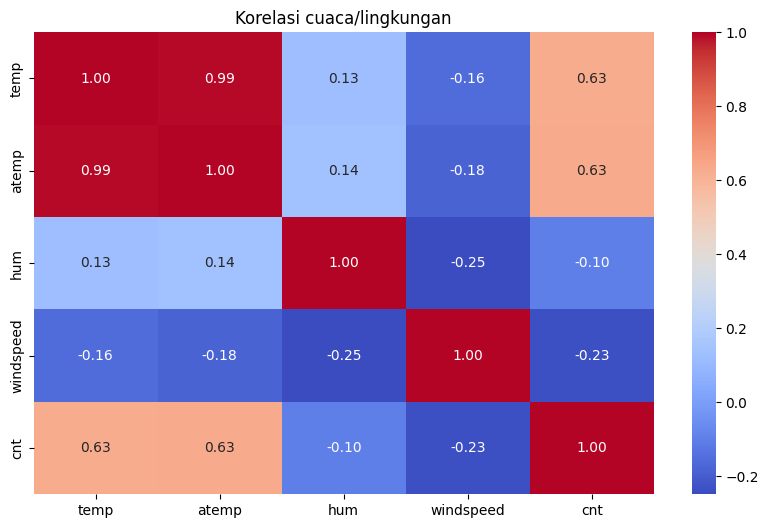

In [59]:
# Visualisasi matriks korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi cuaca/lingkungan')
plt.show()

### Pertanyaan 2: Bagaimana trend penyewaan sepeda sepanjang tahun?

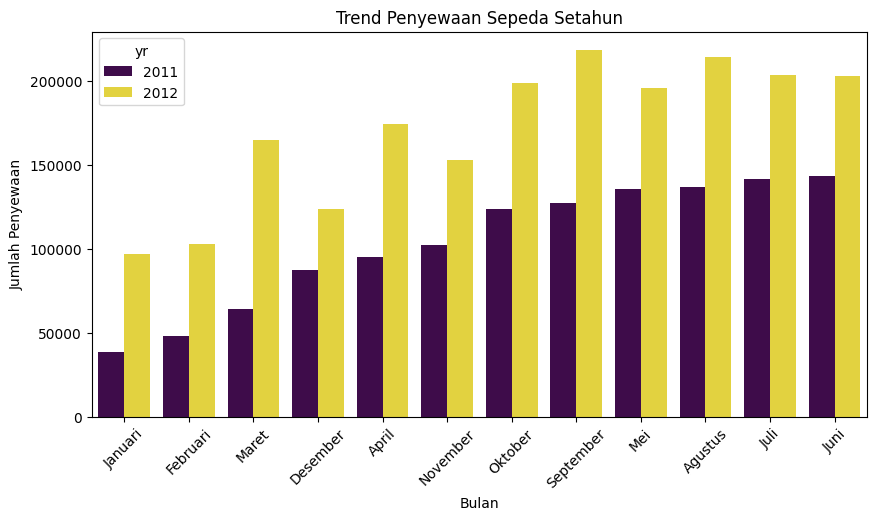

In [60]:
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_rentals, x="mnth", y="cnt", hue="yr", palette='viridis')
plt.title('Trend Penyewaan Sepeda Setahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

<ipython-input-61-05ab7d68d398>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette='viridis')


Text(0, 0.5, 'Rata-rata Jumlah Penyewaan')

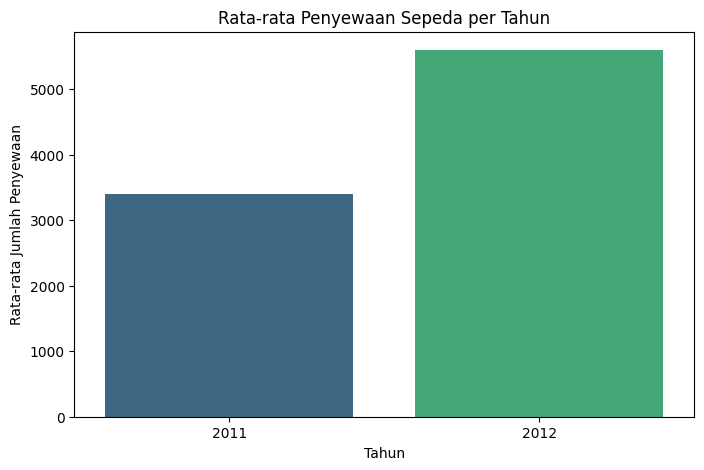

In [61]:
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=yearly_avg.index, y=yearly_avg.values, palette='viridis')

# Menambahkan detail visualisasi
plt.title('Rata-rata Penyewaan Sepeda per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Jumlah Penyewaan')

### Pertanyaan 3: Bagaimana hari dalam minggu memengaruhi jumlah penyewaan?







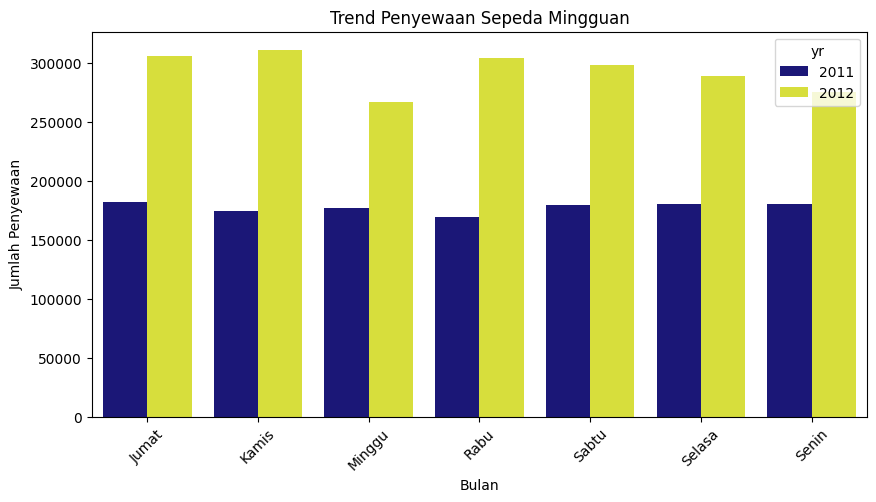

In [62]:
plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_total, x="weekday", y="cnt", hue="yr", palette='plasma')
plt.title('Trend Penyewaan Sepeda Mingguan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 4: Bagaimana pengaruh kategori suhu terhadap jumlah penyewaan?

<ipython-input-63-1fd75890c37a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='atemp_category', y='cnt', data=result, palette='plasma')


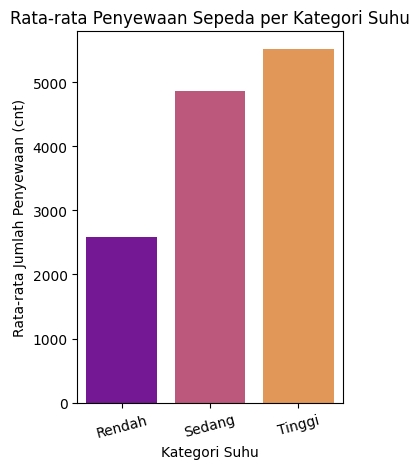

In [63]:
# Plot rata-rata cnt
plt.subplot(1, 2, 2)  # subplot kedua
sns.barplot(x='atemp_category', y='cnt', data=result, palette='plasma')
plt.title('Rata-rata Penyewaan Sepeda per Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Rata-rata Jumlah Penyewaan (cnt)')
plt.xticks(rotation=15)

# Menampilkan visualisasi
plt.tight_layout()  # Mengatur layout agar tidak bertumpuk
plt.show()

### Pertanyaan 5: Berapa banyak penyewaan yang dilakukan oleh pelanggan terdaftar dibandingkan dengan pelanggan kasual?

<Figure size 1000x600 with 0 Axes>

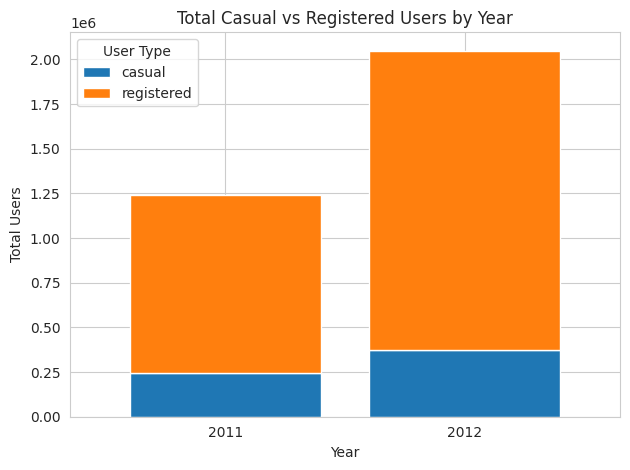

In [64]:
# Mengatur gaya visualisasi
sns.set_style("whitegrid")

# Membuat bar plot
plt.figure(figsize=(10, 6))
users.plot(kind="bar", stacked=True, color=["#1f77b4", "#ff7f0e"], width=0.8)

# Menambahkan judul dan label sumbu
plt.title("Total Casual vs Registered Users by Year")
plt.xlabel("Year")
plt.ylabel("Total Users")
plt.xticks(rotation=0)
plt.legend(title="User Type")

# Menampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan 6: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

<ipython-input-65-82ad1862ffe8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_per_season, x="season", y="cnt", palette='coolwarm')


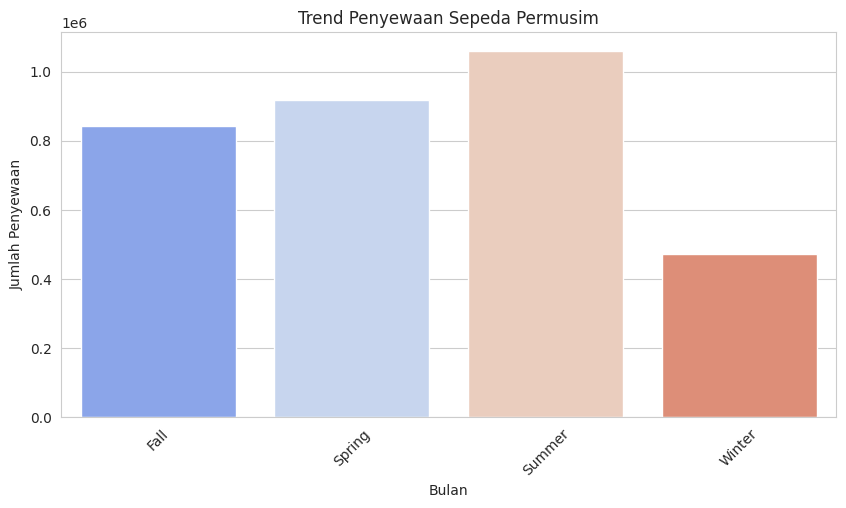

In [65]:
plt.figure(figsize=(10, 5))
sns.barplot(data=total_per_season, x="season", y="cnt", palette='coolwarm')
plt.title('Trend Penyewaan Sepeda Permusim')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

**Insight:**
- atemp dan temp berkorelasi positif dengan cnt, sedangkan hum dan windspeed tidak berkorelasi dengan cnt
- Rata-rata Jumlah Penyewaan tertinggi terdapat pada bulan Juni 2011 dan September 2012 dimana hingga Desember mengalami kenaikan dan penurunan di bulan-bulan tertentu.
- Penyewa tahun 2012 lebih banyak daripada penyewa pada tahun 2011
- rata-rata jumlah penyewa sepeda paling rendah terdapat pada bulan Januari 2011
- Rata-rata dan jumlah penyewa yang terdaftar lebih banyak daripada yang casual
- Rata-rata penyewa sepeda lebih suka menyewa sepeda saat summer
- Rata-rata penyewa menyewa sepeda saat suhu dalam kategori tinggi


## Analisis Lanjutan (Opsional)

In [66]:
day_df_after.to_csv("day_after_clean.csv", index=False)

## Conclusion

- Pertanyaan 1: Penyewaan sepeda cenderung lebih tinggi pada cuaca cerah dan menurun saat cuaca buruk, seperti hujan. Kondisi cuaca yang lebih bersahabat menarik lebih banyak penyewa.
- Pertanyaan 2: Penyewaan sepeda tertinggi terjadi selama musim panas dan menurun selama musim dingin. Bulan Juni 2011 menunjukkan puncak penyewaan, sementara tahun 2012 bulan September memiliki jumlah tertinggi.
- Pertanyaan 3: Jumlah penyewaan sepeda cenderung lebih tinggi di akhir pekan (Sabtu & minggu), menunjukkan peningkatan pengguna casual yang memanfaatkan waktu luang untuk bersepeda.
- Pertanyaan 4: Semakin tinggi suhu, semakin tinggi pula jumlah penyewaan. Kategori suhu “Tinggi” menunjukkan rata-rata penyewaan tertinggi, sementara suhu rendah memiliki rata-rata penyewaan lebih sedikit.
- Pertanyaan 5: Jumlah penyewaan oleh pelanggan terdaftar lebih banyak dibandingkan pelanggan casual, menunjukkan preferensi yang kuat dari pelanggan tetap, terutama pada hari kerja.
- Pertanyaan 6: Musim panas (summer) memiliki rata-rata penyewaan tertinggi, menunjukkan bahwa musim yang hangat sangat memengaruhi jumlah pengguna, terutama yang terdaftar.